In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [19]:
df = pd.read_csv('data/car_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
print('the shape of data is ', df.shape)

the shape of data is  (11914, 16)


In [21]:
print('The null values in each are ',df.isnull().sum())

The null values in each are  Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


Handle Null Valuesabs

Tasks to do:
#Handle null values
#If a column has more than 40% null values, drop that column
#Else fill the null values with mean of that columns

In [22]:
for column in df.columns:
    if df[column].isnull().sum() > (0.40 * len(df)):
        df.drop(labels=column, axis=1, inplace=True)
    elif df[column].isnull().sum():
        if df[column].dtype in ['float64', 'int64']:
            df[column].replace(np.nan, df[column].mean(), inplace=True)
        else:
            # Handle non-numeric columns, e.g., replace NaN with a placeholder or the most frequent value
            df[column].replace(np.nan, 'placeholder', inplace=True)

print(df)


          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

Convert the categorial features to numerical values using Label ENcoder from sklearn

In [23]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Model'] = le.fit_transform(df['Model'])

print(df.head())
print(df['Model'].unique())


  Make  Model  Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  BMW      1  2011  premium unleaded (required)      335.0               6.0   
1  BMW      0  2011  premium unleaded (required)      300.0               6.0   
2  BMW      0  2011  premium unleaded (required)      300.0               6.0   
3  BMW      0  2011  premium unleaded (required)      230.0               6.0   
4  BMW      0  2011  premium unleaded (required)      230.0               6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   
3            MANUAL  rear wheel drive              2.0   
4            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     

##Handle Outliers

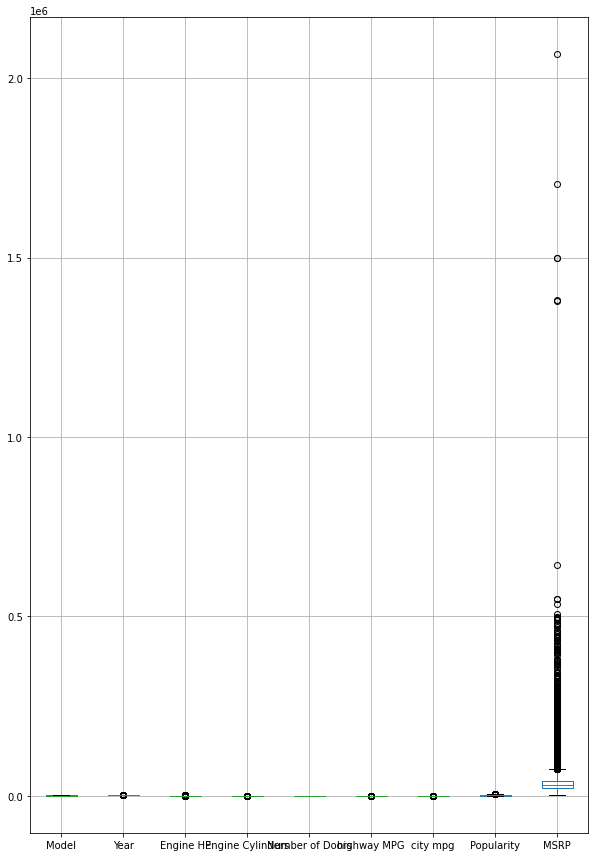

In [24]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(15,10))
plt.show()

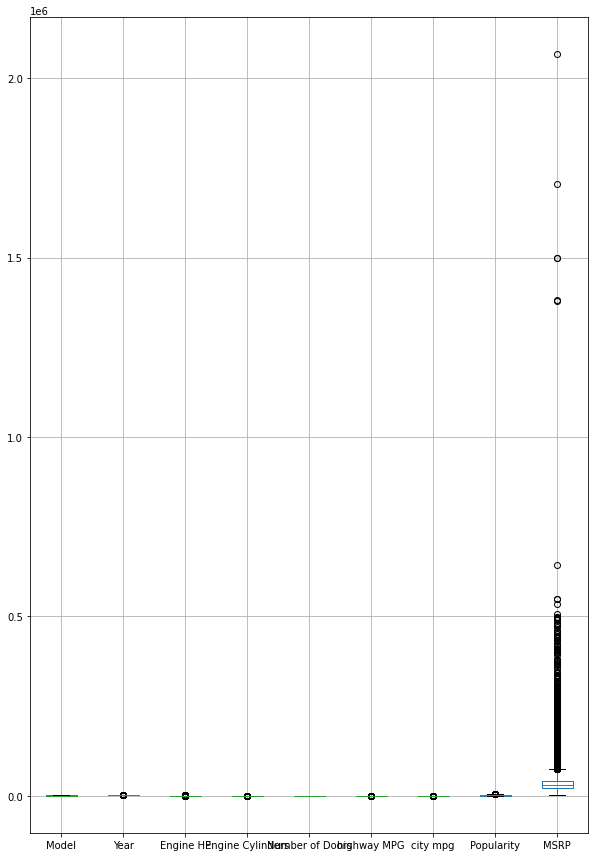

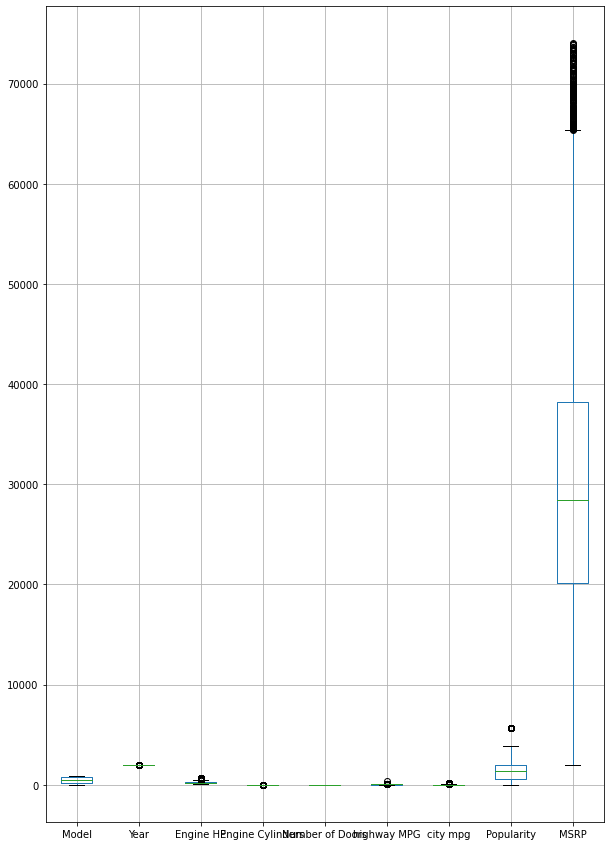

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df[(df['MSRP'] >= lower_bound) & (df['MSRP'] <= upper_bound)]

df.boxplot(figsize=(10,15))
plt.show()
df_filtered.boxplot(figsize=(10,15))
plt.show()

Calculate correlation
Plot the correlation
Compare the correlation

In [26]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered['Model'] = le.fit_transform(df_filtered['Model'])

print(df_filtered.head())
print(df_filtered['Model'].unique())


  Make  Model  Year             Engine Fuel Type  Engine HP  Engine Cylinders  \
0  BMW      1  2011  premium unleaded (required)      335.0               6.0   
1  BMW      0  2011  premium unleaded (required)      300.0               6.0   
2  BMW      0  2011  premium unleaded (required)      300.0               6.0   
3  BMW      0  2011  premium unleaded (required)      230.0               6.0   
4  BMW      0  2011  premium unleaded (required)      230.0               6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   
3            MANUAL  rear wheel drive              2.0   
4            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     

MSRP                1.000000
Model               0.047333
Year                0.696262
Engine HP           0.732803
Engine Cylinders    0.285623
Name: MSRP, dtype: float64


<AxesSubplot:>

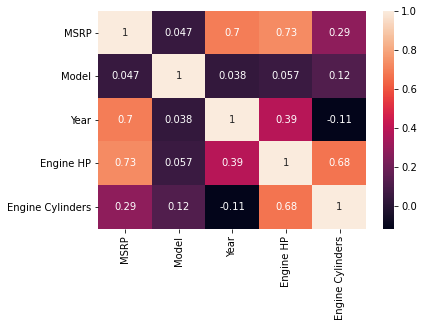

In [27]:
correlation_matrix = df_filtered[['MSRP', 'Model', 'Year', 'Engine HP', 'Engine Cylinders']].corr()
msrp_correlation = correlation_matrix['MSRP']

print(msrp_correlation)

import seaborn as sns

sns.heatmap(correlation_matrix,annot = True)

In [28]:
df_filtered = df_filtered[[ 'Model', 'Year', 'Engine HP', 'Engine Cylinders','MSRP']]
from sklearn.model_selection import train_test_split
X= df_filtered.iloc[:,:-1]
y= df_filtered.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8734, 4)
(2184, 4)
(8734,)
(2184,)


Perform K-Fold cross validation

In [29]:
df_filtered.head()

,Model,Year,Engine HP,Engine Cylinders,MSRP
0,1,2011,335.0,6.0,46135
1,0,2011,300.0,6.0,40650
2,0,2011,300.0,6.0,36350
3,0,2011,230.0,6.0,29450
4,0,2011,230.0,6.0,34500


In [30]:
import warnings 
warnings.filterwarnings("ignore")

In [32]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[]
models.append(('lr',LogisticRegression()))
#models.append(('decision tree',DecisionTreeClassifier()))
#models.append(('svm',SVC(gamma='auto')))
#models.append(('knn',KNeighborsClassifier()))
#models.append(('naive bayes',GaussianNB()))
#models.append(('Random Forest',RandomForestClassifier()))
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    cross_val_sc=cross_val_score(model,X,y,scoring='accuracy',cv=kfold)
    print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr : acc: 0.0936060273365498(standard deviation: 0.007908204213258175)


Train a logic regression model for prediction

In [ ]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

Evaluate the Model

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))